In [ ]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive 

In [ ]:
from fastai.vision import *

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
root_path = "/content/drive/My Drive/proj_ball_class"

In [ ]:
# (Path(root_path)/'Balls').mkdir(parents=True, exist_ok=True)

In [ ]:
proj_path = "/content/drive/My Drive/proj_ball_class/Balls"

In [ ]:
# folders = ['golf','baseball','basketball','soccer','tennis','bowling','lacrosse','american_football','rugby','cricket','volleyball','dragon','pool','hockey','softball']

In [ ]:
# for i in folders:
#   path = Path(proj_path)
#   # dest = (path/i).mkdir(parents=True, exist_ok=True)

In [ ]:
p_path = Path(proj_path)

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.2, ds_tfms=get_transforms(),size=224,num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes 

['american_football',
 'baseball',
 'basketball',
 'bowling',
 'cricket',
 'dragon',
 'golf',
 'hockey',
 'lacrosse',
 'pool',
 'rugby',
 'soccer',
 'softball',
 'tennis',
 'volleyball']

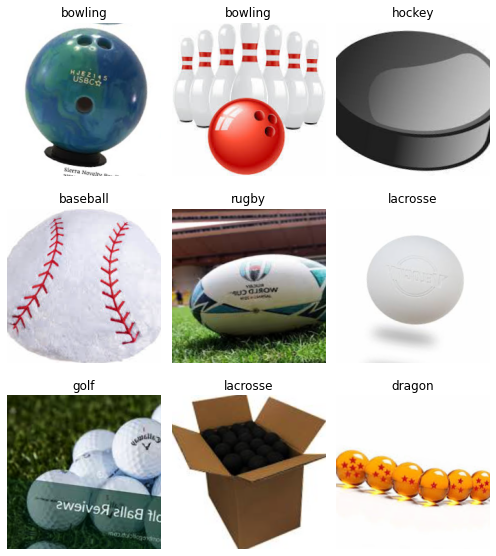

In [ ]:
data.show_batch(rows=3,figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['american_football',
  'baseball',
  'basketball',
  'bowling',
  'cricket',
  'dragon',
  'golf',
  'hockey',
  'lacrosse',
  'pool',
  'rugby',
  'soccer',
  'softball',
  'tennis',
  'volleyball'],
 15,
 1001,
 250)

In [ ]:
# membuat objek cnn_learner
# menggunakan resnet34 untuk transfer learning

learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
# melakukan training sebanyak 8 epoch terhadap model

learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,3.214972,0.901798,0.244000,03:57
1,1.874677,0.317423,0.100000,00:17
2,1.217350,0.256006,0.068000,00:14
3,0.842916,0.293395,0.084000,00:14
4,0.613062,0.296919,0.076000,00:14
5,0.466294,0.278070,0.068000,00:14
6,0.360678,0.268871,0.060000,00:14
7,0.281490,0.269701,0.060000,00:14


In [ ]:
learn.save("model_resnet34", return_path=True)

PosixPath('/content/drive/My Drive/proj_ball_class/Balls/models/model_resnet34.pth')

In [ ]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


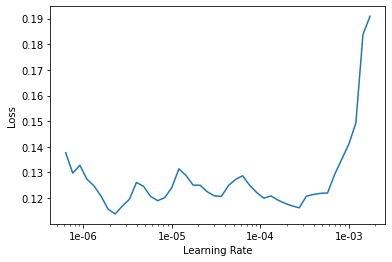

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-06,1e-4),wd=.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.109595,0.271548,0.064000,00:15
1,0.105384,0.262235,0.064000,00:15


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


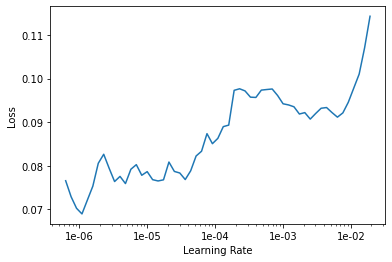

In [ ]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.save("model2_resnet34")

In [ ]:
learn.load("model_resnet34")

Learner(data=ImageDataBunch;

Train: LabelList (1001 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
golf,golf,golf,golf,golf
Path: /content/drive/My Drive/proj_ball_class/Balls;

Valid: LabelList (250 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
american_football,softball,pool,volleyball,hockey
Path: /content/drive/My Drive/proj_ball_class/Balls;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fa

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

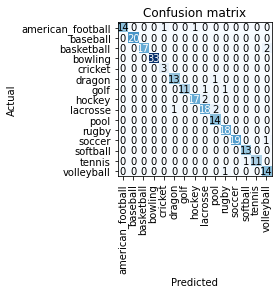

In [ ]:
interp.plot_confusion_matrix()

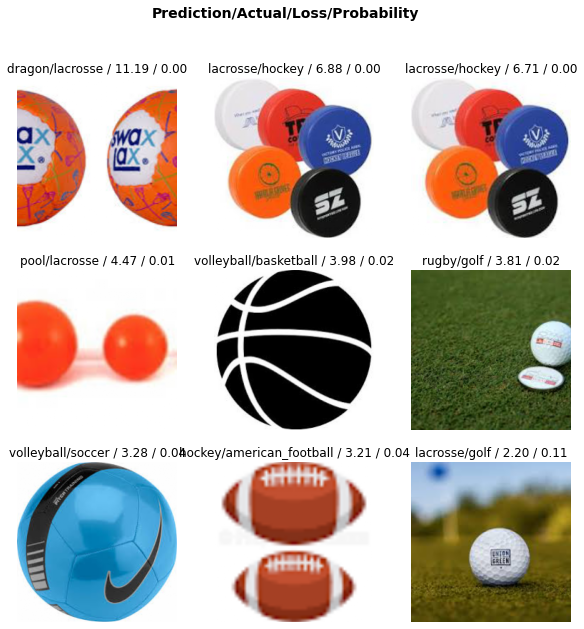

In [ ]:
interp.plot_top_losses(9, figsize=(10,10))